In [1]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.pytorch import PytorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_whar_cfg

In [2]:
cfg = get_whar_cfg(WHARDatasetID.KU_HAR)
dataset = PytorchAdapter(cfg, override_cache=True)

Overriding cache...
Creating config hash...
Checking download...
Download exists.
Checking sessions...
Sessions exist.
Parsing...


Caching sessions: 100%|██████████| 1945/1945 [00:03<00:00, 599.24it/s]


Validating common format...
[########################################] | 100% Completed | 1.37 sms
Common format validated.
Checking windowing...
Loading config hash...
Windowing exists.
Selecting activities...
[########################################] | 100% Completed | 4.36 ss


Loading windows: 100%|██████████| 45559/45559 [00:25<00:00, 1778.54it/s]

subject_ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88]
activity_ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [29]:
train_loader, val_loader, test_loader = dataset.get_dataloaders(
    train_batch_size=32, override_cache=False, subj_cross_val_group_index=2
)

Getting normalization parameters...


Normalizing windows: 100%|██████████| 45559/45559 [00:07<00:00, 5835.91it/s]


Getting normalization parameters...
Creating normalization parameters hash...
train: 36086 | val: 4009 | test: 5464


In [18]:
weights = dataset.get_class_weights(test_loader)
print(weights)

{4: 0.23012088423092747, 5: 0.29915714950020567, 3: 0.3009924694357898, 1: 0.3009924694357898, 0: 0.3124953663569028, 2: 0.32235067357446606, 6: 0.3445349193682144, 7: 0.4251453424439665, 11: 0.6257879147708385, 10: 0.936293368664766, 8: 0.997190498334019, 12: 1.3859257773455858, 15: 1.6353924172677912, 16: 1.715446591539641, 17: 1.7905756393442969, 14: 1.8171026858531012, 13: 1.978297278952973, 9: 2.582198553580723}


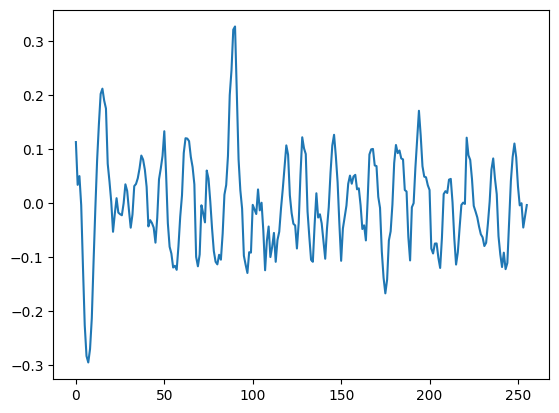

In [28]:
y, x = next(iter(train_loader))

plt.plot(x[0, :, 1])
plt.show()